In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

# parsing html file into a dataframe

After trying multiple file outputs from mysql workbench, html output works the best in retaining the correct format of the file. CSV format cannot capture the uneven distrubution of spaces in the msg body.  

In [13]:
df = pd.read_html('reflections.html', header = 0)[0]
df.head()

,person_id,module_id,msg_id,reply_to,msg_body,person_name,module_slug
0,79,40,1713,NaN,1. Pick one of the tasks that you found most c...,strong gibbon,functions-serverless
1,88,46,2125,NaN,Agreed. Although I think I would have liked to...,towering ostrich,machine-learning
2,80,57,2022,NaN,Probably the most difficult assignment in this...,sturdy wren,data-consistency
3,73,58,2512,NaN,"For this project, I just followed the instruct...",shrewd urchin,iterative-processing
4,17,58,2640,NaN,Agreed,curious bulldog,iterative-processing


In [14]:
# find out the number of characters in each reflection
df['char_count'] = df.msg_body.str.len()
df1 = df[df.person_id>=0] # filter out all the msgs which are '******'
df1

,person_id,module_id,msg_id,reply_to,msg_body,person_name,module_slug,char_count
0,79,40,1713,NaN,1. Pick one of the tasks that you found most c...,strong gibbon,functions-serverless,1805
1,88,46,2125,NaN,Agreed. Although I think I would have liked to...,towering ostrich,machine-learning,76
2,80,57,2022,NaN,Probably the most difficult assignment in this...,sturdy wren,data-consistency,296
3,73,58,2512,NaN,"For this project, I just followed the instruct...",shrewd urchin,iterative-processing,239
4,17,58,2640,NaN,Agreed,curious bulldog,iterative-processing,6
...,...,...,...,...,...,...,...,...
868,87,39,1218,NaN,The primers are really helpful to finish the p...,tourmaline rattlesnake,containers,511
869,66,39,1202,NaN,cost me loads of time to test the cloud deploy...,puzzling dogfish,containers,124
870,20,62,1447,NaN,**Describe your approach to solving each task ...,dandelion booby,social-network,611
871,72,39,1222,NaN,Easier than Project 2.1 because we only need t...,scrupulous deer,containers,233


In [15]:
groups = df1.groupby(['person_id', 'module_slug'])

# mgg - module slug group
len(groups)
for g, mgg in groups:
    print(g, mgg['module_id'])

(1, 'big-data-analytics') 653    36
Name: module_id, dtype: int64
(1, 'containers') 535    39
Name: module_id, dtype: int64
(1, 'data-consistency') 707    57
Name: module_id, dtype: int64
(1, 'files-vs-databases') 843    42
Name: module_id, dtype: int64
(1, 'functions-serverless') 495    40
Name: module_id, dtype: int64
(1, 'iterative-processing') 28    58
Name: module_id, dtype: int64
(1, 'machine-learning') 177    46
396    46
815    46
Name: module_id, dtype: int64
(1, 'sequential-analysis') 52    35
Name: module_id, dtype: int64
(1, 'social-network') 335    62
Name: module_id, dtype: int64
(1, 'stream-processing') 607    45
Name: module_id, dtype: int64
(1, 'vm-scaling') 48     38
164    38
Name: module_id, dtype: int64
(3, 'big-data-analytics') 500    36
Name: module_id, dtype: int64
(3, 'containers') 111    39
Name: module_id, dtype: int64
(3, 'data-consistency') 498    57
Name: module_id, dtype: int64
(3, 'files-vs-databases') 743    42
Name: module_id, dtype: int64
(3, 'functio

(63, 'data-consistency') 667    57
Name: module_id, dtype: int64
(63, 'functions-serverless') 473    40
Name: module_id, dtype: int64
(63, 'iterative-processing') 776    58
Name: module_id, dtype: int64
(63, 'machine-learning') 284    46
805    46
Name: module_id, dtype: int64
(63, 'sequential-analysis') 266    35
316    35
Name: module_id, dtype: int64
(63, 'social-network') 417    62
Name: module_id, dtype: int64
(63, 'stream-processing') 610    45
Name: module_id, dtype: int64
(63, 'vm-scaling') 40     38
227    38
Name: module_id, dtype: int64
(64, 'big-data-analytics') 193    36
Name: module_id, dtype: int64
(64, 'containers') 449    39
Name: module_id, dtype: int64
(64, 'data-consistency') 807    57
Name: module_id, dtype: int64
(64, 'functions-serverless') 546    40
Name: module_id, dtype: int64
(64, 'iterative-processing') 848    58
Name: module_id, dtype: int64
(64, 'machine-learning') 499    46
698    46
Name: module_id, dtype: int64
(64, 'sequential-analysis') 830    35
Name

In [16]:
# df1 = pd.read_html('fact_event_discussion_msgid.html', header = 0)[0]
# df2 = pd.read_html('fact_event_submission_score.html', header = 0)[0]

# df1.head()
# df2.head()

# len(df1), len(df2)

In [17]:
df2 = pd.read_html('viz_module_scores.html', header = 0)[0]
df2

,person_id,final_score
0,1,90
1,2,0
2,3,90
3,4,90
4,5,90
...,...,...
91,92,0
92,93,90
93,94,90
94,95,90


In [18]:
# create a dictionary of person_id as the key and final_score as a value

score_dict = pd.Series(df2.final_score.values,index=df2.person_id).to_dict()

In [19]:
pip install nltk==3.3


Note: you may need to restart the kernel to use updated packages.


In [21]:
# for i in range(len(df1)):
#     df1['scores'].iloc[i] = score_dict[df1.person_id.iloc[i]]


In [22]:
import nltk

# Scores and Reflections combined dataset 

reflections are for reply_to == NULL

In [37]:
df3 = pd.read_html('score_and_reflection.html', header = 0)[0]
df3 = df3[df3['person_id'] >= 0]
df3

,module_id,person_id,score,person_name,module_slug,module_name,msg_body,reply_to
0,35,1,90,abstract hound,sequential-analysis,Sequential Analysis,**Describe your approach to solving each task ...,NaN
1,35,4,90,adaptable lori,sequential-analysis,Sequential Analysis,I also used git since I am used to it already....,NaN
2,35,5,90,adorable bee,sequential-analysis,Sequential Analysis,"When solving tasks, the first thing I would do...",NaN
3,35,6,90,ambitious wapiti,sequential-analysis,Sequential Analysis,It is the first time for me to look through su...,NaN
4,35,8,85,aspiring cow,sequential-analysis,Sequential Analysis,The project had the following main tasks - 1. ...,NaN
...,...,...,...,...,...,...,...,...
605,39,87,85,tourmaline rattlesnake,containers,Containers: Docker and Kubernetes,The primers are really helpful to finish the p...,NaN
606,40,41,63,imposing monkey,functions-serverless,Functions as a Service,This project was much much more difficult than...,NaN
607,45,21,42,daring tamarin,stream-processing,Stream Processing with Kafka and Samza,I wish I had more time to finish this project.,NaN
608,45,81,20,teal mussel,stream-processing,Stream Processing with Kafka and Samza,The time is so limited when comparing with the...,NaN


In [38]:
import re 

# using regex (findall())
# to count words in string

df3['word_count'] = 0
df3.msg_body = df3.msg_body.astype(str)

for i in range(len(df3)):
    df3['word_count'].iloc[i] = len(re.findall(r'\w+', df3.msg_body[i]))

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [39]:
df3

,module_id,person_id,score,person_name,module_slug,module_name,msg_body,reply_to,word_count
0,35,1,90,abstract hound,sequential-analysis,Sequential Analysis,**Describe your approach to solving each task ...,NaN,163
1,35,4,90,adaptable lori,sequential-analysis,Sequential Analysis,I also used git since I am used to it already....,NaN,25
2,35,5,90,adorable bee,sequential-analysis,Sequential Analysis,"When solving tasks, the first thing I would do...",NaN,226
3,35,6,90,ambitious wapiti,sequential-analysis,Sequential Analysis,It is the first time for me to look through su...,NaN,146
4,35,8,85,aspiring cow,sequential-analysis,Sequential Analysis,The project had the following main tasks - 1. ...,NaN,322
...,...,...,...,...,...,...,...,...,...
605,39,87,85,tourmaline rattlesnake,containers,Containers: Docker and Kubernetes,The primers are really helpful to finish the p...,NaN,91
606,40,41,63,imposing monkey,functions-serverless,Functions as a Service,This project was much much more difficult than...,NaN,98
607,45,21,42,daring tamarin,stream-processing,Stream Processing with Kafka and Samza,I wish I had more time to finish this project.,NaN,10
608,45,81,20,teal mussel,stream-processing,Stream Processing with Kafka and Samza,The time is so limited when comparing with the...,NaN,28


In [29]:
c_maxes = df3.groupby(['person_id', 'module_slug']).word_count.transform(max)
# df = df.loc[df.C == c_maxes]
c_maxes

0      163
1      155
2      226
3      146
4      322
      ... 
605     91
606     98
607     10
608     28
609     80
Name: word_count, Length: 610, dtype: int64

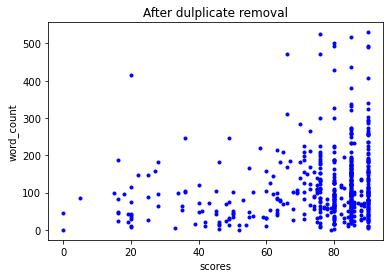

In [50]:
plt.plot(df4.score, df4.word_count, 'b.')
plt.title('After dulplicate removal')
plt.xlabel('scores')
plt.ylabel('word_count');

     person_id  score         module_slug  word_count
338          1     85  big-data-analytics         163
     person_id  score module_slug  word_count
425          1     85  containers         107
     person_id  score         module_slug  word_count
507          1     88  files-vs-databases          94
     person_id  score           module_slug  word_count
466          1     80  functions-serverless         187
     person_id  score       module_slug  word_count
251          1     86  machine-learning          95
252          1     86  machine-learning          27
555          1     86  machine-learning          10
   person_id  score          module_slug  word_count
0          1     90  sequential-analysis         163
     person_id  score        module_slug  word_count
521          1     87  stream-processing          73
    person_id  score module_slug  word_count
98          1     71  vm-scaling          25
99          1     71  vm-scaling         103
     person_id  score    

     person_id  score        module_slug  word_count
526         17     88  stream-processing          39
     person_id  score module_slug  word_count
383         17     76  vm-scaling          41
384         17     76  vm-scaling         109
     person_id  score         module_slug  word_count
345         20     85  big-data-analytics         190
     person_id  score module_slug  word_count
435         20     85  containers         136
     person_id  score         module_slug  word_count
510         20     62  files-vs-databases         145
     person_id  score           module_slug  word_count
471         20     80  functions-serverless         162
   person_id  score          module_slug  word_count
8         20     90  sequential-analysis         172
     person_id  score        module_slug  word_count
527         20     19  stream-processing          20
     person_id  score module_slug  word_count
385         20     56  vm-scaling         101
     person_id  score         mo

350         33     85  big-data-analytics         232
     person_id  score module_slug  word_count
439         33     85  containers          61
     person_id  score           module_slug  word_count
189         33     16  functions-serverless          47
479         33     16  functions-serverless          37
     person_id  score       module_slug  word_count
266         33     74  machine-learning          57
267         33     74  machine-learning          18
568         33     74  machine-learning          27
     person_id  score          module_slug  word_count
306         33     90  sequential-analysis         256
     person_id  score        module_slug  word_count
533         33     90  stream-processing          49
     person_id  score module_slug  word_count
394         33     76  vm-scaling         152
    person_id  score         module_slug  word_count
63         34     85  big-data-analytics          70
     person_id  score module_slug  word_count
440         34    

487         46     80  functions-serverless          18
     person_id  score       module_slug  word_count
276         46     46  machine-learning           2
     person_id  score          module_slug  word_count
23          46     90  sequential-analysis          27
601         46     90  sequential-analysis           5
     person_id  score        module_slug  word_count
537         46     80  stream-processing           2
     person_id  score         module_slug  word_count
72          47     85  big-data-analytics         256
355         47     85  big-data-analytics          35
     person_id  score module_slug  word_count
164         47     85  containers         134
     person_id  score         module_slug  word_count
222         47     63  files-vs-databases         213
     person_id  score           module_slug  word_count
488         47     80  functions-serverless         110
    person_id  score          module_slug  word_count
24         47     90  sequential-analysis

492         60     18  functions-serverless          97
     person_id  score       module_slug  word_count
581         60     33  machine-learning           4
     person_id  score          module_slug  word_count
31          60     90  sequential-analysis          90
317         60     90  sequential-analysis          16
     person_id  score        module_slug  word_count
541         60     20  stream-processing          10
     person_id  score module_slug  word_count
405         60     66  vm-scaling          72
    person_id  score         module_slug  word_count
80         61     40  big-data-analytics          49
     person_id  score module_slug  word_count
453         61     83  containers          67
     person_id  score         module_slug  word_count
224         61     50  files-vs-databases          34
     person_id  score          module_slug  word_count
32          61     63  sequential-analysis          45
318         61     63  sequential-analysis          17
     p

88         74     60  big-data-analytics         158
     person_id  score module_slug  word_count
459         74     85  containers         130
     person_id  score          module_slug  word_count
327         74     90  sequential-analysis         136
     person_id  score module_slug  word_count
415         74     76  vm-scaling         179
     person_id  score         module_slug  word_count
367         75     85  big-data-analytics         101
     person_id  score module_slug  word_count
171         75     85  containers         112
     person_id  score           module_slug  word_count
498         75     80  functions-serverless         226
     person_id  score       module_slug  word_count
285         75     64  machine-learning          23
589         75     64  machine-learning          78
     person_id  score          module_slug  word_count
328         75     90  sequential-analysis         185
     person_id  score        module_slug  word_count
546         75     50 

214         89     71  functions-serverless         187
    person_id  score          module_slug  word_count
46         89     90  sequential-analysis         152
47         89     90  sequential-analysis          62
     person_id  score module_slug  word_count
140         89     67  vm-scaling          25
141         89     67  vm-scaling         185
     person_id  score         module_slug  word_count
372         90     85  big-data-analytics           8
373         90     85  big-data-analytics         156
     person_id  score module_slug  word_count
176         90     65  containers          69
     person_id  score           module_slug  word_count
215         90     80  functions-serverless          90
     person_id  score       module_slug  word_count
595         90     80  machine-learning          94
     person_id  score          module_slug  word_count
334         90     90  sequential-analysis          93
     person_id  score        module_slug  word_count
551        

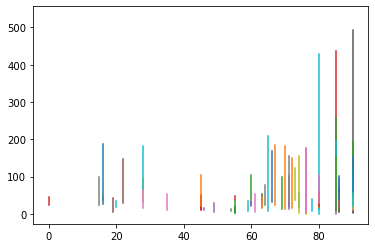

In [25]:
for g, group in df3.groupby(['person_id', 'module_slug']):
    if person_id
    print(group[['person_id', 'score', 'module_slug', 'word_count']])
    plt.plot(group.score, group.word_count)

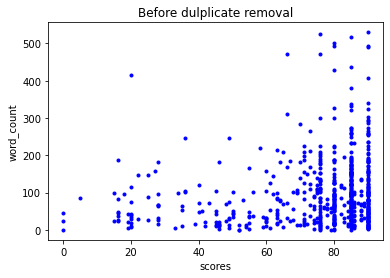

In [51]:
plt.plot(df3.score, df3.word_count, 'b.')
plt.title('Before dulplicate removal')
plt.xlabel('scores')
plt.ylabel('word_count');

In [52]:
df4 = df3.groupby(['person_id', 'module_slug']).max()[['word_count', 'score']].reset_index()

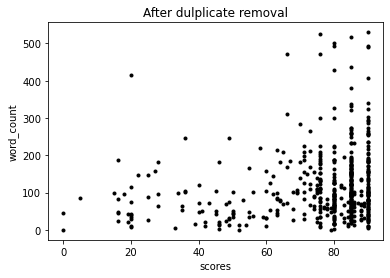

In [57]:
plt.plot(df4.score, df4.word_count, 'k.')
plt.title('After dulplicate removal')
plt.xlabel('scores')
plt.ylabel('word_count');

In [63]:
from sklearn.linear_model import LinearRegression

X = np.array(df4.score).reshape(1, -1)
y = np.array(df4.word_count).reshape(1, -1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
y_pred = reg.predict(y)


C:\Users\adity\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


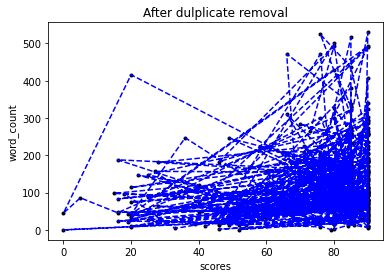

In [66]:
plt.plot(df4.score, df4.word_count, 'k.')
plt.plot(df4.score, y_pred.T, 'b--')
plt.title('After dulplicate removal')
plt.xlabel('scores')
plt.ylabel('word_count');